Naive Bayes is classified mainly in three types:
    
    1. Bernoulli: All the features are in binary format ( 0 or 1)
    2. Multinomial: Features are discrete. (ex: 1 to 5 movie ratings. Each rating will have their own frequency)
    3. Gaussian Naive Bayes: Continuous data (any random integer)
    

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


__Checking for any null values in dataframe__

In [2]:
df.isnull().sum() #Age column has 177 null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__Handling null values__

In [3]:
med_age= df['Age'].mean()
med_age

29.69911764705882

In [4]:
med_age_series = df['Age'].fillna(med_age)
med_age_series

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [5]:
df['Age']= med_age_series

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum() # age null values filled with median. Rest of the nan columns will not be considered for predictions.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__Splitting X and y from dataframe__

In [8]:
X=df[['Pclass','Sex','Age','Fare']] 
X

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [9]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

__Creating dummy variable for text in age column : (using pandas) (sklearn can also be used - shown in decision tree DS)__

In [10]:
dummies = pd.get_dummies(X.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
X = pd.concat([X,dummies], axis = 'columns')
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [12]:
X = X.drop('Sex',axis = 'columns')
X

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [13]:
X.columns[X.isna().any()] # we see no empty cells. Another method to find given below

Index([], dtype='object')

In [14]:
X.isnull().sum() #to find empty cells in dataframe

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

__Train test split__

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # (flattened 2d array,1d array)

In [16]:
len(X_train),len(X_test),len(y_train),len(y_test)

(712, 179, 712, 179)

__Gaussian Naivebayes Model__

In [17]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()

In [18]:
NBmodel.fit(X_train,y_train)

GaussianNB()

In [19]:
NBmodel.score(X_test,y_test)

0.7932960893854749

In [20]:
X_test[:10] #show from row 0 till row 10.

,Pclass,Age,Fare,female,male
478,3,22.000000,7.5208,0,1
766,1,29.699118,39.6000,0,1
100,3,28.000000,7.8958,1,0
494,3,21.000000,8.0500,0,1
490,3,29.699118,19.9667,0,1
23,1,28.000000,35.5000,0,1
775,3,18.000000,7.7500,0,1
250,3,29.699118,7.2500,0,1
646,3,19.000000,7.8958,0,1
451,3,29.699118,19.9667,0,1


In [21]:
y_test[:10]

478    0
766    0
100    0
494    0
490    0
23     1
775    0
250    0
646    0
451    0
Name: Survived, dtype: int64

In [22]:
y_pred=NBmodel.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
NBmodel.predict_proba(X_test)[:10]

array([[0.98885654, 0.01114346],
       [0.90177052, 0.09822948],
       [0.08794906, 0.91205094],
       [0.98868839, 0.01131161],
       [0.99019501, 0.00980499],
       [0.90785698, 0.09214302],
       [0.98791178, 0.01208822],
       [0.98995141, 0.01004859],
       [0.9881948 , 0.0118052 ],
       [0.99019501, 0.00980499]])

__Confusion_Matrix__

Text(1.5, 0.5, 'True')

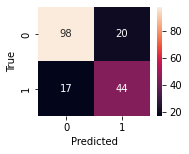

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

import seaborn as sn
plt.figure (figsize =(2.5,2))
sn.heatmap(cm, annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")

__Predicting score using Cross Validation Technique__

In [25]:
from sklearn.model_selection import cross_val_score  # default n_splits= 5.Train test split is not required for C-validation
cross_val_score(NBmodel,X,y) # (splits into train and test data internally, and gives the score.)
# Details explained in Cross validation Folder

array([0.79329609, 0.80337079, 0.78089888, 0.74719101, 0.79775281])

In [26]:
np.mean(cross_val_score(NBmodel,X,y)) # Mean of the above scores.

0.7845019145063085